I have used scrapy to generate a csv file containing user and critic reviews for the most discussed movies from 2010 to 2018. In this notebook, I will look at the resulting dataframe and analyze what the result is.

In [98]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("white")
plt.style.use("seaborn-pastel")

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
meta_df = pd.read_csv("./metacritic/metacritic_final.csv")

In [5]:
meta_df.head(5)

,genre,metascore,movie,release_date,review,review_score,user_score,user_type,username
0,"Action,Sci-Fi,Drama,Mystery,Thriller",74,Inception,"July 16, 2010",I'd like to keep my review rather to the point.,8,8.8,user,SimonBradley
1,"Action,Sci-Fi,Drama,Mystery,Thriller",74,Inception,"July 16, 2010","Inception is a daring original, and mind-provo...",8,8.8,user,ReviewCritic
2,"Action,Sci-Fi,Drama,Mystery,Thriller",74,Inception,"July 16, 2010",What makes Inception so special is that it's ...,10,8.8,user,fantasy
3,"Action,Sci-Fi,Drama,Mystery,Thriller",74,Inception,"July 16, 2010",I was hoping to give it a better score. I'll ...,4,8.8,user,vikesh2206
4,"Action,Sci-Fi,Drama,Mystery,Thriller",74,Inception,"July 16, 2010",Funny how people think complex equals smart a...,1,8.8,user,eagleeyeviking


Rearranging the columns into a more easy to read way:

In [6]:
cols = list(meta_df.columns.values)
cols

['genre',
 'metascore',
 'movie',
 'release_date',
 'review',
 'review_score',
 'user_score',
 'user_type',
 'username']

In [7]:
meta_df = meta_df[['movie', 'genre', 'release_date', 'metascore', 'user_score', 'user_type', 'username', 'review', 'review_score']]

In [8]:
meta_df.head(5)

,movie,genre,release_date,metascore,user_score,user_type,username,review,review_score
0,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,SimonBradley,I'd like to keep my review rather to the point.,8
1,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,ReviewCritic,"Inception is a daring original, and mind-provo...",8
2,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,fantasy,What makes Inception so special is that it's ...,10
3,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,vikesh2206,I was hoping to give it a better score. I'll ...,4
4,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,8.8,user,eagleeyeviking,Funny how people think complex equals smart a...,1


Here, I'm looking for how many missing columns, and if its a low number (it is), I just drop them. The reason for this is missing reviews are difficult to impute, and missing user_scores can indicate that the movie has too few reviews in general. It is because of this, that I feel dropping these observations is okay.

In [9]:
null_col = meta_df.columns[meta_df.isnull().any()]

meta_df[null_col].isnull().sum()

user_score    91
review        34
dtype: int64

In [10]:
meta_df_no_missing = meta_df.dropna()

In [11]:
print(meta_df.shape)
print(meta_df_no_missing.shape)

(133305, 9)
(133180, 9)


The critic reviews are on a scale 0-100, and the user reviews are only from 0-10. Instead of dealing with decimal values afterwards, these next two lines are just to 'normalize' the user review scores (if the user_type is a user!), and the average user score for each movie from 0-100.

In [12]:
meta_df_no_missing.loc[:,'user_score'] = meta_df_no_missing.user_score * 10

meta_df_no_missing.loc[meta_df_no_missing.user_type == 'user', "review_score"] = meta_df_no_missing.loc[meta_df_no_missing.user_type == 'user', "review_score"] * 10

/Users/joshvichare/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
meta_df_no_missing.head()

,movie,genre,release_date,metascore,user_score,user_type,username,review,review_score
0,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,SimonBradley,I'd like to keep my review rather to the point.,80
1,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,ReviewCritic,"Inception is a daring original, and mind-provo...",80
2,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,fantasy,What makes Inception so special is that it's ...,100
3,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,vikesh2206,I was hoping to give it a better score. I'll ...,40
4,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,eagleeyeviking,Funny how people think complex equals smart a...,10


The genres in the genre column all appear in a list, so the following cells are used to split up each movie review into each review. I.e., if a user says "Inception was good" for the movie **Inception**, that review will show up 5 times, as **Inception** has 5 genres - 'Action', 'Sci-Fi', 'Drama', 'Mystery' and 'Thriller'. 

In [14]:
meta_df_genre = meta_df_no_missing.copy()

In [15]:
meta_df_genre.genre = meta_df_genre.genre.str.split(',')

In [16]:
meta_df_genre.genre.head(5)

0    [Action, Sci-Fi, Drama, Mystery, Thriller]
1    [Action, Sci-Fi, Drama, Mystery, Thriller]
2    [Action, Sci-Fi, Drama, Mystery, Thriller]
3    [Action, Sci-Fi, Drama, Mystery, Thriller]
4    [Action, Sci-Fi, Drama, Mystery, Thriller]
Name: genre, dtype: object

In [17]:
# i keeps tracks of index
index=0

# save [index, genre] in a nested list
genre_list = []
for item in meta_df_genre.genre:
    genre_list.extend(map(lambda x: [index, x], item))
    index += 1
    
genre = pd.DataFrame(genre_list, columns=['index', 'genres'])
genre.head()

,index,genres
0,0,Action
1,0,Sci-Fi
2,0,Drama
3,0,Mystery
4,0,Thriller


In [18]:
meta_df_genre = pd.merge(meta_df_genre.drop('genre', axis=1), genre, how='right', left_index=True, right_on='index')

meta_df_genre.head()

,movie,release_date,metascore,user_score,user_type,username,review,review_score,index,genres
0,Inception,"July 16, 2010",74.0,88.0,user,SimonBradley,I'd like to keep my review rather to the point.,80.0,0,Action
1,Inception,"July 16, 2010",74.0,88.0,user,SimonBradley,I'd like to keep my review rather to the point.,80.0,0,Sci-Fi
2,Inception,"July 16, 2010",74.0,88.0,user,SimonBradley,I'd like to keep my review rather to the point.,80.0,0,Drama
3,Inception,"July 16, 2010",74.0,88.0,user,SimonBradley,I'd like to keep my review rather to the point.,80.0,0,Mystery
4,Inception,"July 16, 2010",74.0,88.0,user,SimonBradley,I'd like to keep my review rather to the point.,80.0,0,Thriller


In [19]:
meta_df_genre.shape

(476642, 10)

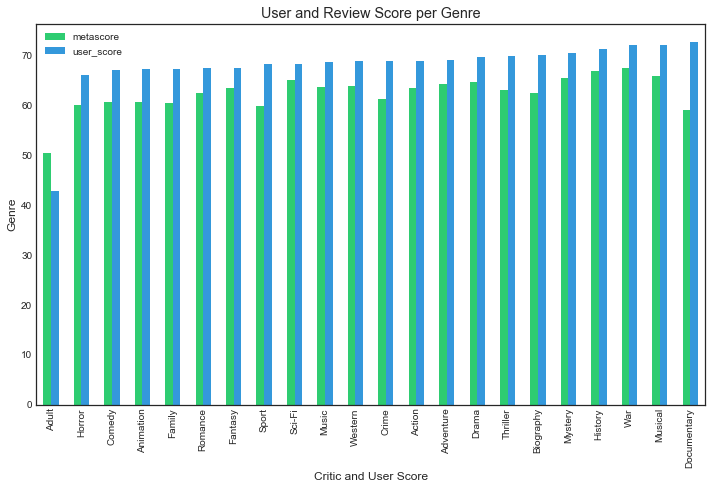

In [118]:
meta_grouped = meta_df_genre.groupby('genres')['metascore', 'user_score'].mean()
meta_grouped = meta_grouped.sort_values('user_score')
meta_grouped.plot(kind='bar', figsize=(12, 7), color = ["#2ecc71", "#3498db"])
plt.xlabel('Critic and User Score')
plt.ylabel('Genre')
plt.title('User and Review Score per Genre')

# plt.savefig('./fig/genre_score.png', bbox_inches='tight', dpi = 300)

In [21]:
# meta_df_genre['score_diff'] = meta_df_genre['user_score'] - meta_df_genre['metascore']

In [22]:
#meta_grouped_diff = meta_df_genre.groupby('genres')['score_diff']

#meta_grouped_diff.plot(kind='barh', figsize=(15, 10), color = "#3498db")
#plt.xlabel('Difference in Score')
#plt.ylabel('Genre')
#plt.title('Score Difference between Users and Critics')

Note, that the following graph is not really representative of the count of movies, but rather, **the density of genres within this dataset**.

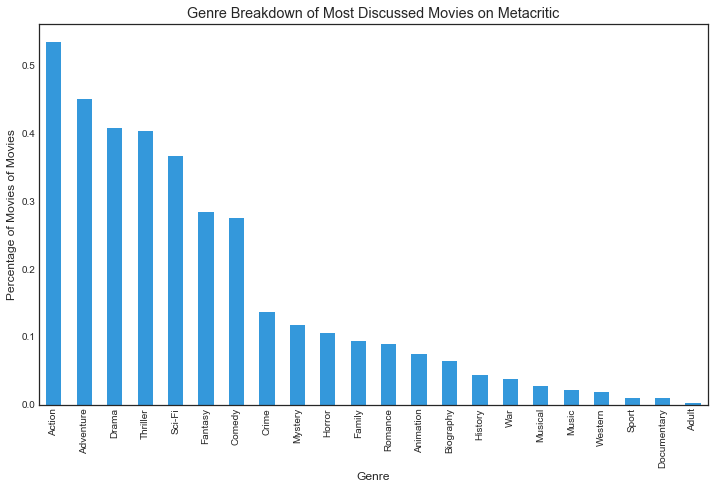

In [104]:
meta_grouped= meta_df_genre.groupby('genres')['movie'].count().sort_values(ascending=False)
perc_genre = meta_grouped / meta_df_no_missing.shape[0]

perc_genre.sort_values(ascending=False)
perc_genre.plot(kind='bar', figsize=(12, 7), color = "#3498db")
plt.xlabel('Genre')
plt.ylabel('Percentage of Movies of Movies')
plt.title('Genre Breakdown of Most Discussed Movies on Metacritic')

# plt.savefig('./fig/perc_genre.png', bbox_inches='tight', dpi = 300)

Filtering and lemmatizing the critic and user reviews to later work with in terms of NLP models. For now, just generating wordclouds between the two.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

NLTKstopWords = set(stopwords.words('english'))

In [35]:
from nltk import WordNetLemmatizer

lemztr = WordNetLemmatizer()

In [36]:
critic_reviews = meta_df_no_missing.loc[meta_df_no_missing.user_type == 'critic'].review

critic_review_nostop = ' '.join([review for review in critic_reviews if review.lower() not in NLTKstopWords])

critic_review_lemm = lemztr.lemmatize(critic_review_nostop)

In [37]:
user_rev = meta_df_no_missing.loc[meta_df_no_missing.user_type == 'user'].review

user_review_nostop = ' '.join([review for review in user_rev if review.lower() not in NLTKstopWords])

user_review_lemm = lemztr.lemmatize(user_review_nostop)

In [38]:
# !pip install wordcloud

In [30]:
from wordcloud import WordCloud,STOPWORDS

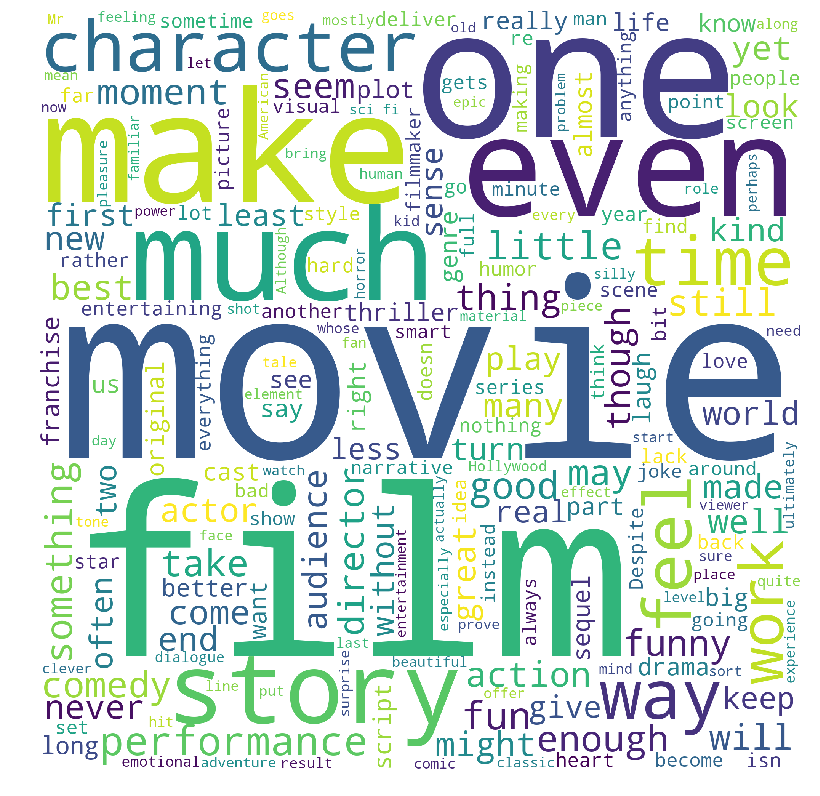

In [31]:
c = WordCloud(background_color = "white", width=2000, height=2000).generate(critic_review_lemm)
plt.figure(1,figsize=(14, 14))
plt.imshow(c)
plt.axis('off')
plt.show()

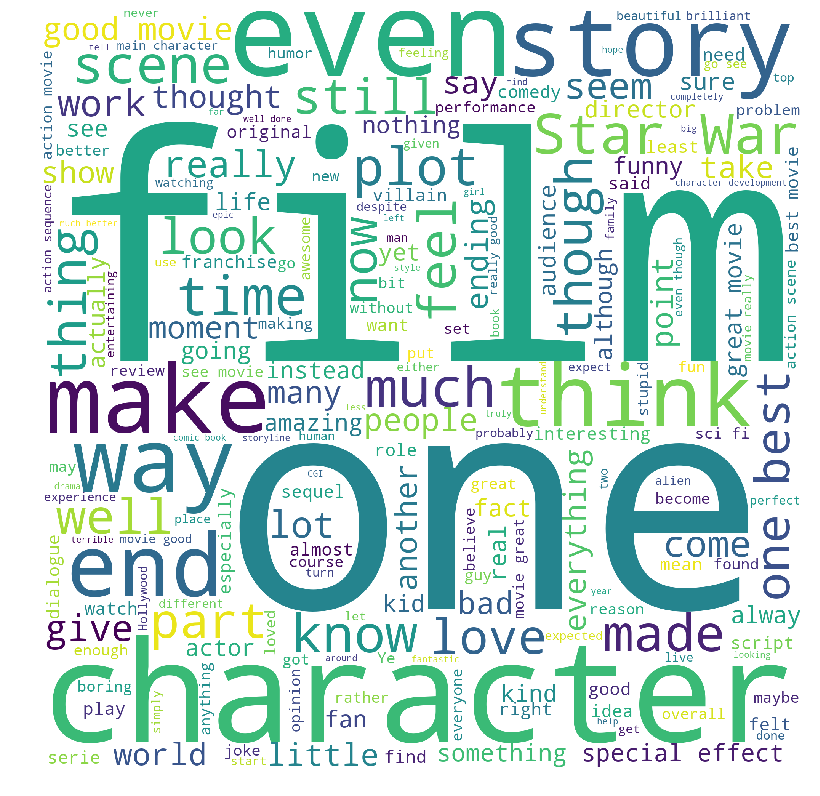

In [32]:
u = WordCloud(background_color = "white", width=2000, height=2000).generate(user_review_lemm)
plt.figure(1,figsize=(14, 14))
plt.imshow(u)
plt.axis('off')
plt.show()

Now, I'm looking more at the differences between user and critic opinions on movies.

In [42]:
meta_df_no_missing.groupby('movie')['metascore', 'user_score'].mean().sort_values(by='metascore', ascending=False).head(10)

,metascore,user_score
movie,,
Boyhood,100.0,77.0
Moonlight,99.0,72.0
Manchester by the Sea,96.0,82.0
12 Years a Slave,96.0,80.0
Gravity,96.0,78.0
A Separation,95.0,89.0
The Social Network,95.0,83.0
Zero Dark Thirty,95.0,69.0
Carol,95.0,80.0


In [43]:
meta_df_no_missing.groupby('movie')['metascore', 'user_score'].mean().sort_values(by='user_score', ascending=False).head(10)

,metascore,user_score
movie,,
Freak Show,54.0,91.0
The Insult,72.0,90.0
Your Name.,79.0,90.0
Becks,64.0,90.0
Whiplash,88.0,89.0
Toy Story 3,92.0,89.0
A Separation,95.0,89.0
The Miracle Season,44.0,88.0
Dredd,60.0,88.0


Metacritic uses an algorithm to "rate" critic reviews on a 0-100 scale, so I am trying see if I can reverse-engineer a very basic version of it by using **Sentiment Analysis** on the critic and user reviews (doing it on the critic reviews to double check). 

In [44]:
from textblob import TextBlob

The following line adds two new columns to the dataframe, both being the results of running SA on each and every review. As such, this might take some time.

In [45]:
meta_df_no_missing[['polarity', 'subjectivity']] = meta_df_no_missing['review'].apply(lambda review: pd.Series(TextBlob(review).sentiment))

/Users/joshvichare/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [46]:
meta_df_no_missing.head(5)

,movie,genre,release_date,metascore,user_score,user_type,username,review,review_score,polarity,subjectivity
0,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,SimonBradley,I'd like to keep my review rather to the point.,80,0.000000,0.000000
1,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,ReviewCritic,"Inception is a daring original, and mind-provo...",80,0.687500,0.525000
2,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,fantasy,What makes Inception so special is that it's ...,100,0.104365,0.582540
3,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,vikesh2206,I was hoping to give it a better score. I'll ...,40,0.160619,0.557190
4,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,eagleeyeviking,Funny how people think complex equals smart a...,10,0.173469,0.556122


Now, I am rescaling the [-1, 1] scale from the results of Sentiment Analysis to [0, 100] as the pseudo-review from the critic/user.

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 100))

In [48]:
meta_df_no_missing[['polarity']] = scaler.fit_transform(meta_df_no_missing[['polarity']])

/Users/joshvichare/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/joshvichare/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [49]:
meta_df_no_missing.head(10)

,movie,genre,release_date,metascore,user_score,user_type,username,review,review_score,polarity,subjectivity
0,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,SimonBradley,I'd like to keep my review rather to the point.,80,50.000000,0.000000
1,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,ReviewCritic,"Inception is a daring original, and mind-provo...",80,84.375000,0.525000
2,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,fantasy,What makes Inception so special is that it's ...,100,55.218254,0.582540
3,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,vikesh2206,I was hoping to give it a better score. I'll ...,40,58.030952,0.557190
4,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,eagleeyeviking,Funny how people think complex equals smart a...,10,58.673469,0.556122
5,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,Shockwave,Not very good really. I've heard the word vis...,50,59.808502,0.513646
6,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,Kewldog,I thought this movie was not as good as people...,20,47.760417,0.701042
7,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,JoeyK,Christopher Nolan directs what must be his mag...,100,61.938776,0.633673
8,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,clkarna,Inception is a spider's web woven with such in...,100,66.944444,0.647222
9,Inception,"Action,Sci-Fi,Drama,Mystery,Thriller","July 16, 2010",74,88.0,user,Azasinner,An amazing film. If you love puzzles and are ...,100,72.500000,0.611111


In [50]:
user_reviews = meta_df_no_missing.loc[meta_df_no_missing.user_type == 'user',:].review
critic_reviews = meta_df_no_missing.loc[meta_df_no_missing.user_type == 'critic',:].review

Looking at the differences between user scores and critic scores and seeing where they are biggest, and for which movies.

In [51]:
meta_df_no_missing['score_diff'] = meta_df_no_missing['metascore'] - meta_df_no_missing['user_score']

/Users/joshvichare/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
meta_df_no_missing.groupby('movie')[['metascore', 'user_score', 'score_diff']].max().sort_values(by = 'score_diff', ascending=False).head(20)

,metascore,user_score,score_diff
movie,,,
Star Wars: Episode VIII - The Last Jedi,85,46.0,39.0
Justin Bieber: Never Say Never,52,16.0,36.0
Ghostbusters,60,29.0,31.0
Oculus,61,34.0,27.0
Moonlight,99,72.0,27.0
Zero Dark Thirty,95,69.0,26.0
Spy,75,50.0,25.0
A Wrinkle in Time,53,28.0,25.0
Boyhood,100,77.0,23.0


In [54]:
meta_df_no_missing.groupby('movie')[['metascore', 'user_score', 'score_diff']].max().sort_values(by = 'score_diff', ascending=True).head(20)

,metascore,user_score,score_diff
movie,,,
The Vanishing Of Sidney Hall,18,73.0,-55.0
Warcraft,32,82.0,-50.0
I Can Only Imagine,29,78.0,-49.0
Hillary's America: The Secret History of the Democratic Party,2,47.0,-45.0
America: Imagine a World Without Her,15,59.0,-44.0
The Miracle Season,44,88.0,-44.0
Death Wish,31,74.0,-43.0
Bright,29,72.0,-43.0
Only God Forgives,37,79.0,-42.0


Analyzing the correlation between the results of Sentiment Analysis and the critic and user score. A correlation value of 1 would be fantastic, but highly unlikely due to the fact that SA is a fairly easy technique to trick, especially when it comes to reviews. The value of 0.51 for the user reviews is relatively promising, meanwhile the lower value for the critic reviews shows high deviance. This is to be expected though, as the critic reviews are for the most part, just a short one/two sentence summary of the actual review available on the critic's source website.

In [55]:
from scipy.stats.stats import pearsonr, linregress

In [56]:
user_rev_score = meta_df_no_missing.loc[meta_df_no_missing.user_type == 'user', 'review_score']
user_rev_pol = meta_df_no_missing.loc[meta_df_no_missing.user_type == 'user', 'polarity']

In [57]:
print(pearsonr(user_rev_score, user_rev_pol))

linregress(user_rev_score, user_rev_pol)

(0.5091943984432017, 0.0)


LinregressResult(slope=0.2028845577188438, intercept=44.61897927064338, rvalue=0.5091943984432007, pvalue=0.0, stderr=0.001061330862847936)

In [58]:
crit_rev_score = meta_df_no_missing.loc[meta_df_no_missing.user_type == 'critic', 'review_score']
crit_rev_pol = meta_df_no_missing.loc[meta_df_no_missing.user_type == 'critic', 'polarity']

In [59]:
print(pearsonr(crit_rev_score, crit_rev_pol))

linregress(crit_rev_score, crit_rev_pol)

(0.24434263497240563, 0.0)


LinregressResult(slope=0.16082516190571738, intercept=46.07762913606611, rvalue=0.24434263497240563, pvalue=0.0, stderr=0.0037621993158816927)

Visualizing the distribution of scores between users and critics, along with the sentiment analysis results.

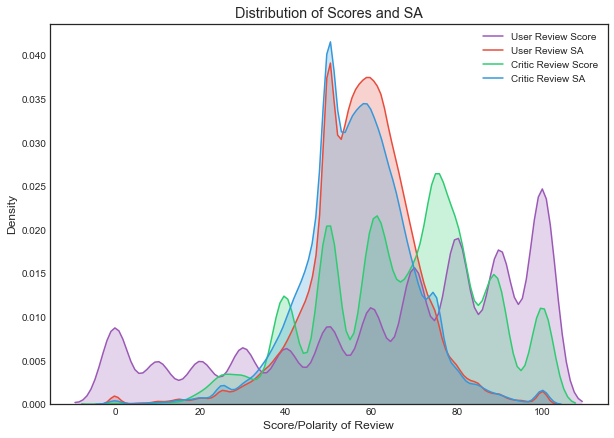

In [110]:
plt.subplots(figsize=(10, 7))
sns.kdeplot(user_rev_score, shade=True, label='User Review Score', color = "#9b59b6")
sns.kdeplot(user_rev_pol, shade=True, label='User Review SA', color = "#e74c3c")
sns.kdeplot(crit_rev_score, shade=True, label='Critic Review Score', color = "#2ecc71")
sns.kdeplot(crit_rev_pol, shade=True, label='Critic Review SA', color = "#3498db")
plt.ylabel('Density')
plt.xlabel('Score/Polarity of Review')
plt.title('Distribution of Scores and SA')

# plt.savefig('./fig/score_SA_dist.png', bbox_inches='tight', dpi = 300)

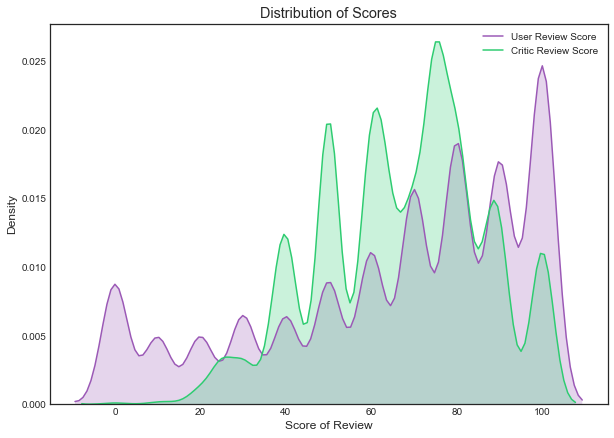

In [112]:
plt.subplots(figsize=(10, 7))
sns.kdeplot(user_rev_score, shade=True, label='User Review Score', color = "#9b59b6")
sns.kdeplot(crit_rev_score, shade=True, label='Critic Review Score', color = "#2ecc71")
plt.ylabel('Density')
plt.xlabel('Score of Review')
plt.title('Distribution of Scores')

# plt.savefig('./fig/score_dist.png', bbox_inches='tight', dpi = 300)